# Easy ways to visualise data with Polars

In [1]:
import altair as alt
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

In [2]:
l_dataset = pl.scan_parquet('data10/lineitem.parquet')

In [3]:
l_dataset.limit(5).collect()

l_orderkey,l_partkey,l_suppkey,l_linenumber,l_quantity,l_extendedprice,l_discount,l_tax,l_returnflag,l_linestatus,l_shipdate,l_commitdate,l_receiptdate,l_shipinstruct,l_shipmode,comments,column_17
i64,i64,i64,i64,i64,f64,f64,f64,str,str,datetime[μs],datetime[μs],datetime[μs],str,str,str,str
1,1551894,76910,1,17,33078.94,0.04,0.02,"""N""","""O""",1996-03-13 00:00:00,1996-02-12 00:00:00,1996-03-22 00:00:00,"""DELIVER IN PER...","""TRUCK""","""egular courts ...",null
1,673091,73092,2,36,38306.16,0.09,0.06,"""N""","""O""",1996-04-12 00:00:00,1996-02-28 00:00:00,1996-04-20 00:00:00,"""TAKE BACK RETU...","""MAIL""","""ly final depen...",null
1,636998,36999,3,8,15479.68,0.1,0.02,"""N""","""O""",1996-01-29 00:00:00,1996-03-05 00:00:00,1996-01-31 00:00:00,"""TAKE BACK RETU...","""REG AIR""","""riously. regul...",null
1,21315,46316,4,28,34616.68,0.09,0.06,"""N""","""O""",1996-04-21 00:00:00,1996-03-30 00:00:00,1996-05-16 00:00:00,"""NONE""","""AIR""","""lites. fluffil...",null
1,240267,15274,5,24,28974.0,0.1,0.04,"""N""","""O""",1996-03-30 00:00:00,1996-03-14 00:00:00,1996-04-01 00:00:00,"""NONE""","""FOB""",""" pending foxes...",null


In [4]:
l_df = l_dataset.groupby('l_shipdate').agg([
        pl.col('l_quantity').mean().alias('avg_qty')
    ])

In [5]:
l_df.limit(10).sort(by='l_shipdate').collect()

l_shipdate,avg_qty
datetime[μs],f64
1993-11-09 00:00:00,25.566574
1994-01-16 00:00:00,25.450701
1994-02-02 00:00:00,25.439736
1996-01-29 00:00:00,25.533328
1996-01-30 00:00:00,25.530943
1996-03-13 00:00:00,25.528817
1996-03-30 00:00:00,25.431131
1996-04-12 00:00:00,25.519042
1996-04-21 00:00:00,25.633526


## Seaborn

CPU times: user 20 s, sys: 309 ms, total: 20.3 s
Wall time: 3.42 s


<Axes: xlabel='l_shipdate', ylabel='avg_qty'>

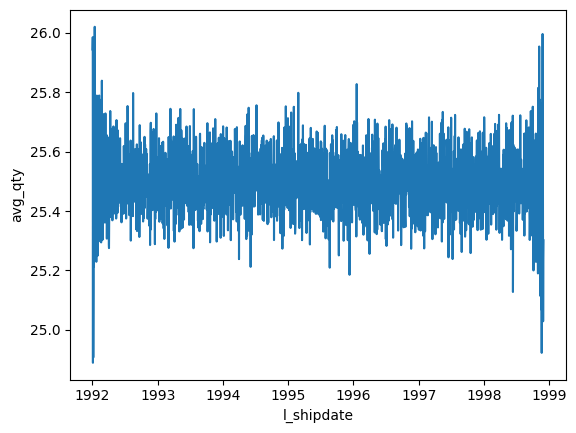

In [6]:
%%time

sns.lineplot(data=l_df.collect(),
            x='l_shipdate',
            y='avg_qty')

CPU times: user 20.1 s, sys: 360 ms, total: 20.5 s
Wall time: 3.65 s


<Axes: xlabel='avg_qty', ylabel='Count'>

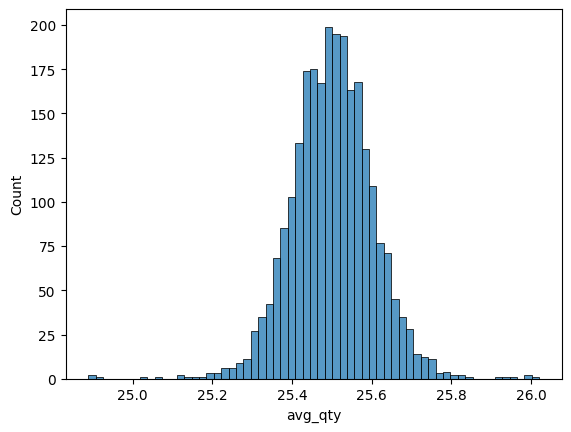

In [7]:
%%time

sns.histplot(
    data=(l_df.collect()),
    x='avg_qty'
)

## Matplotlib

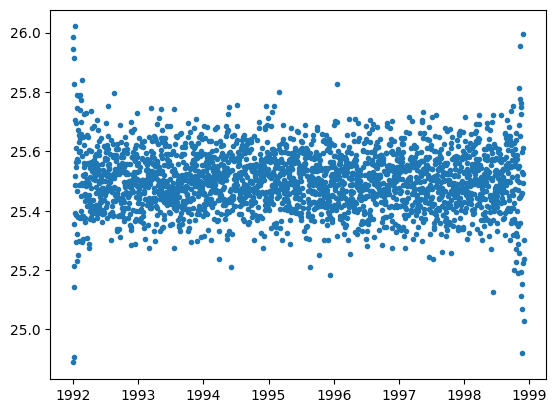

CPU times: user 39.6 s, sys: 496 ms, total: 40.1 s
Wall time: 6.84 s


In [8]:
%%time

shipdate = l_df.select(pl.col('l_shipdate')).collect()
values = l_df.select(pl.col('avg_qty')).collect()

plt.scatter(shipdate, values, marker='.')

plt.show()

CPU times: user 20.2 s, sys: 351 ms, total: 20.6 s
Wall time: 3.5 s


(array([   3.,    3.,   11.,  111.,  659., 1121.,  522.,   84.,    6.,
           6.]),
 array([24.88870432, 25.00188292, 25.11506152, 25.22824011, 25.34141871,
        25.45459731, 25.56777591, 25.68095451, 25.79413311, 25.90731171,
        26.0204903 ]),
 <BarContainer object of 10 artists>)

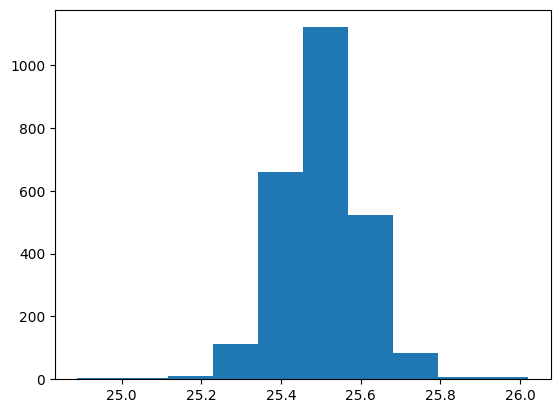

In [9]:
%%time

values = l_df.select(pl.col('avg_qty')).collect()

plt.hist(values)

## Altair, other packages and Pandas plotting

In [10]:
from datetime import datetime

import altair as alt
import pandas as pd

l_o = pl.scan_parquet('./data10/orders.parquet')

In [11]:
source = l_df.collect().to_pandas()

### Altair

In [12]:
%%time

alt.Chart(source).mark_bar().encode(
    alt.X("avg_qty", bin=alt.Bin(maxbins=20)),
    y='count()'    
)

CPU times: user 6.54 ms, sys: 1.13 ms, total: 7.66 ms
Wall time: 7.81 ms


alt.Chart(...)

In [13]:
%%time

alt.Chart(l_df.collect().to_pandas()).mark_line().encode(
    alt.X('l_shipdate'),
    alt.Y('avg_qty', scale=alt.Scale(domain=[24.5, 26.5])))

CPU times: user 19.9 s, sys: 365 ms, total: 20.2 s
Wall time: 3.66 s


alt.Chart(...)

### Plotting with Pandas

CPU times: user 19.8 s, sys: 329 ms, total: 20.1 s
Wall time: 3.45 s


<Axes: xlabel='l_shipdate', ylabel='avg_qty'>

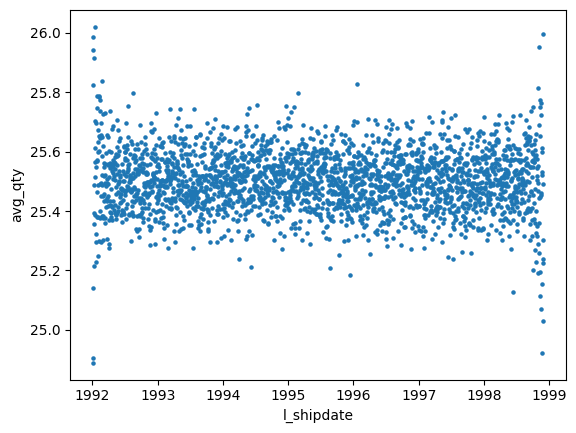

In [14]:
%%time

l_df.collect().to_pandas().plot(x='l_shipdate', y='avg_qty', kind='scatter', marker='.')

### TPCH Query 4

In [15]:
%%time

(
    l_dataset.join(l_o, left_on="l_orderkey", right_on="o_orderkey")
    .filter(pl.col("l_commitdate") < pl.col("l_receiptdate"))
    .unique(subset=["o_orderpriority", "l_orderkey"])
    .groupby("o_orderpriority")
    .agg(pl.count().alias("order_count"))
    .sort(by="o_orderpriority")
    .with_columns(pl.col("order_count").cast(pl.datatypes.Int64))
).collect()

CPU times: user 13.3 s, sys: 2.47 s, total: 15.8 s
Wall time: 4.79 s


o_orderpriority,order_count
str,i64
"""1-URGENT""",2753958
"""2-HIGH""",2750977
"""3-MEDIUM""",2749788
"""4-NOT SPECIFIE...",2751007
"""5-LOW""",2747744


CPU times: user 13.2 s, sys: 2.36 s, total: 15.6 s
Wall time: 4.51 s


<Axes: xlabel='o_orderpriority'>

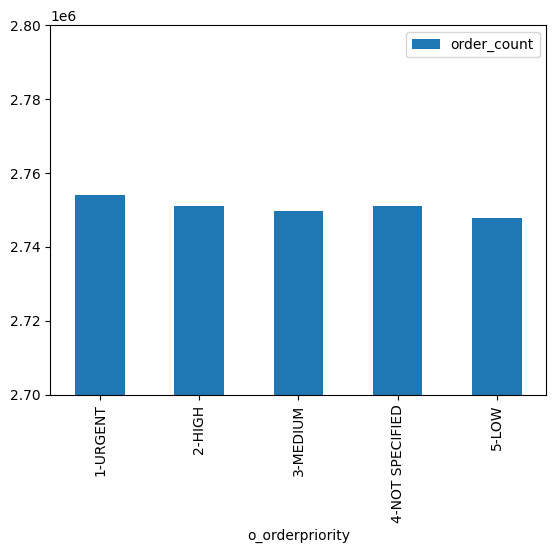

In [16]:
%%time

(
    l_dataset.join(l_o, left_on="l_orderkey", right_on="o_orderkey")
    .filter(pl.col("l_commitdate") < pl.col("l_receiptdate"))
    .unique(subset=["o_orderpriority", "l_orderkey"])
    .groupby("o_orderpriority")
    .agg(pl.count().alias("order_count"))
    .sort(by="o_orderpriority")
    .with_columns(pl.col("order_count").cast(pl.datatypes.Int64))
).collect().to_pandas().plot(x='o_orderpriority', kind='bar', ylim=[2.7*1e6, 2.8*1e6])